# Testing correlations that should be similar for statistical significance using two-year data COMPAS data and Steiger and Fisher methods for comparing correlations

In [106]:
from IPython.display import Image
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

import seaborn as sns
sns.set()

import warnings
warnings.simplefilter("ignore")

In [107]:
df = pd.read_csv('data/compas-scores-two-years-clean')
df.head()

,Unnamed: 0,id,name,first,last,sex,dob,age,age_cat,race,...,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,end,event,two_year_recid
0,0,1,miguel hernandez,miguel,hernandez,Male,1947-04-18,69,Greater than 45,Other,...,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,327,0,0
1,1,3,kevon dixon,kevon,dixon,Male,1982-01-22,34,25 - 45,African-American,...,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,159,1,1
2,2,4,ed philo,ed,philo,Male,1991-05-14,24,Less than 25,African-American,...,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,63,0,1
3,3,5,marcu brown,marcu,brown,Male,1993-01-21,23,Less than 25,African-American,...,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1174,0,0
4,4,6,bouthy pierrelouis,bouthy,pierrelouis,Male,1973-01-22,43,25 - 45,Other,...,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,1102,0,0


In [108]:
#Correlation between age and decile score
xy = df['age'].corr(df['decile_score'])
xy

-0.38773255375203747

In [109]:
#Correlation between age and two-year recidivism
xz = df['age'].corr(df['two_year_recid'])
xz

-0.1903234822204188

In [110]:
#Correlation between decile score and two-year recidivism
yz = df['decile_score'].corr(df['two_year_recid'])
yz

0.35070264269452134

In [111]:
df['age'].count()

7214

In [112]:
df['decile_score'].count()

7214

In [113]:
n = df['two_year_recid'].count()
n

7214

## Hypothesis: COMPAS risk scores overestimate decline in recidivism with age

In [114]:
import numpy as np
from scipy.stats import t, norm
from math import atanh, pow
from numpy import tanh

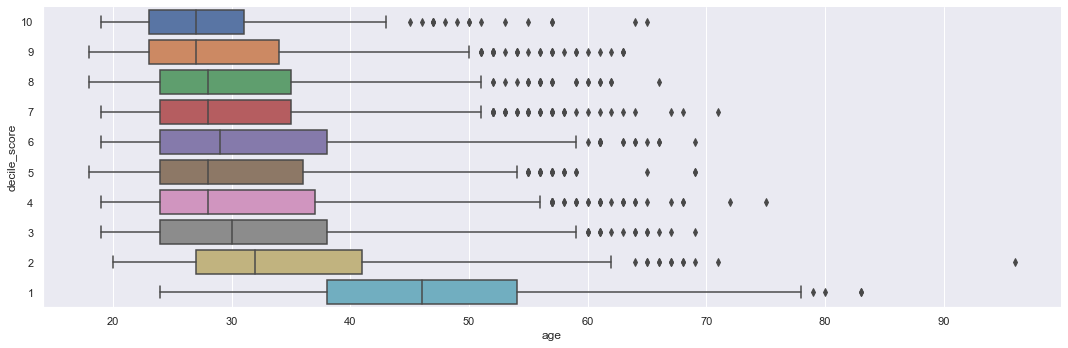

In [115]:
sns.catplot(data=df, x='age', y='decile_score', orient = 'h', kind = 'box', aspect = 3, order = [10,9,8,7,6,5,4,3,2,1])

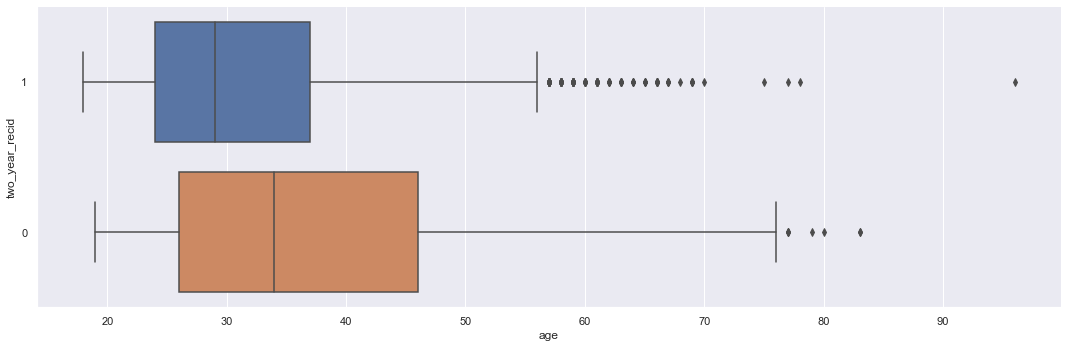

In [116]:
sns.catplot(data=df, x='age', y='two_year_recid', aspect = 3, kind = 'box', orient = 'h', order = [1,0])

In [36]:
def dependent_corr(xy, xz, yz, n, twotailed=True, conf_level=0.95):
    """
    Calculates the statistical significance between two dependent correlation coefficients
    @param xy: correlation coefficient between x and y
    @param xz: correlation coefficient between x and z
    @param yz: correlation coefficient between y and z
    @param n: number of elements in x, y and z
    @param twotailed: whether to calculate a one or two tailed test, only works for 'steiger' method
    @param conf_level: confidence level, only works for 'zou' method
    @param method: defines the method uses, 'steiger' or 'zou'
    @return: t and p-val
    """
    d = xy - xz
    determin = 1 - xy * xy - xz * xz - yz * yz + 2 * xy * xz * yz
    av = (xy + xz)/2
    cube = (1 - yz) * (1 - yz) * (1 - yz)

    t2 = d * np.sqrt((n - 1) * (1 + yz)/(((2 * (n - 1)/(n - 3)) * determin + av * av * cube)))
    p = 1 - t.cdf(abs(t2), n - 3)

    if twotailed:
        p *= 2
    
    return t2, p

In [37]:
dependent_corr(xy, xz, yz, n, twotailed = False)

(-15.868951111828885, 0.0)

#### The p-value for the difference between age vs. recidivism and decile score vs. recidivism is 0, so we can conclude that the COMPAS risk scores overestimate the degree to which recidivism declines with age.

## Hypothesis: COMPAS risk scores overestimate decline in violent recidivism with age

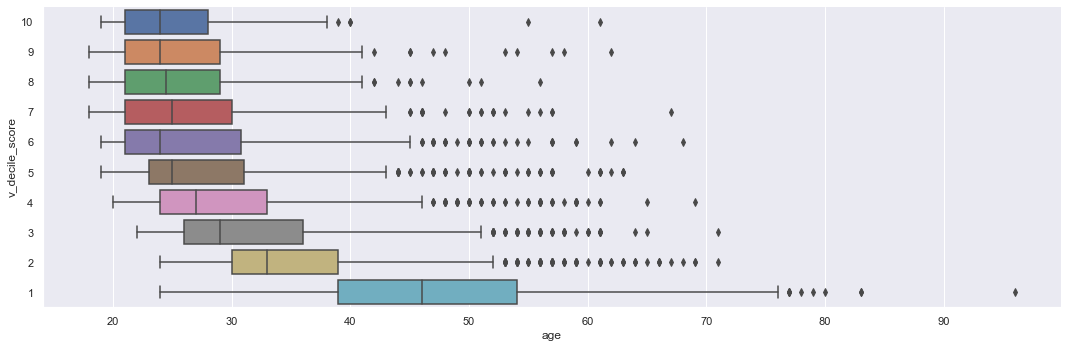

In [103]:
sns.catplot(data=df, x='age', y='v_decile_score', orient = 'h', kind = 'box', aspect = 3, order = [10,9,8,7,6,5,4,3,2,1])

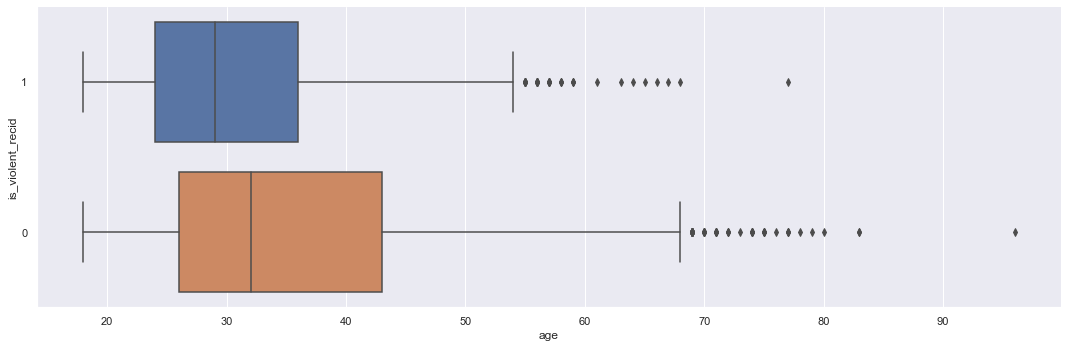

In [75]:
sns.catplot(data=df, x='age', y='is_violent_recid', aspect = 3, kind = 'box', orient = 'h', order = [1,0])

In [56]:
xy = df['age'].corr(df['v_decile_score'])
xy

-0.5758998496151271

In [59]:
df.describe()

,Unnamed: 0,id,age,decile_score,priors_count,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,end,event,two_year_recid
count,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,2316.000000,0.0,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000
mean,3606.500000,5501.255753,34.817993,4.509565,3.472415,0.481148,20.269430,NaN,0.113529,4.509565,3.691849,553.436651,0.382867,0.450652
std,2082.646754,3175.706870,11.888922,2.856396,4.882538,0.499679,74.871668,NaN,0.317261,2.856396,2.510148,399.020583,0.486120,0.497593
min,0.000000,1.000000,18.000000,1.000000,0.000000,0.000000,-1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1803.250000,2735.250000,25.000000,2.000000,0.000000,0.000000,0.000000,NaN,0.000000,2.000000,1.000000,148.250000,0.000000,0.000000
50%,3606.500000,5509.500000,31.000000,4.000000,2.000000,0.000000,0.000000,NaN,0.000000,4.000000,3.000000,530.500000,0.000000,0.000000
75%,5409.750000,8246.500000,42.000000,7.000000,5.000000,1.000000,1.000000,NaN,0.000000,7.000000,5.000000,914.000000,1.000000,1.000000
max,7213.000000,11001.000000,96.000000,10.000000,38.000000,1.000000,993.000000,NaN,1.000000,10.000000,10.000000,1186.000000,1.000000,1.000000


In [57]:
xz = df['age'].corr(df['is_violent_recid'])
xz

-0.09703285771719442

In [58]:
yz = df['v_decile_score'].corr(df['is_violent_recid'])
yz

0.17954998229700206

In [60]:
dependent_corr(xy, xz, yz, 7214, twotailed = False)

(-37.92618864990362, 0.0)

#### With a p-value of 0, we can conclude that the COMPAS risk scores for violence overestimate the decline in violent recidivism as age increases.

## Hypothesis: Correlation between decile score and recidivism is different for African-Americans than for Caucasians

In [38]:
xy = (df[(df.race == 'African-American')].decile_score).corr(df['two_year_recid'])
xy

0.33389497211860036

In [39]:
xz = (df[(df.race == 'Caucasian')].decile_score).corr(df['two_year_recid'])
xz

0.3358525164041781

### Nevermind!

## Hypothesis: Correlation between COMPAS risk scores and recidivism is higher for men than women

In [40]:
# Rationale for one-tailed hypothesis: 
# https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm

In [41]:
xy = (df[(df.sex == 'Male')].decile_score).corr(df['two_year_recid'])
xy

0.3524960732182592

In [42]:
df[(df.sex == 'Male')].count()

Unnamed: 0              5819
id                      5819
name                    5819
first                   5819
last                    5819
sex                     5819
dob                     5819
age                     5819
age_cat                 5819
race                    5819
decile_score            5819
priors_count            5819
c_jail_in               5579
c_jail_out              5579
c_offense_date          4862
c_charge_degree         5819
c_charge_desc           5798
is_recid                5819
r_charge_degree         2941
r_days_from_arrest      1970
r_offense_date          2941
r_charge_desc           2893
r_jail_in               1970
r_jail_out              1970
violent_recid              0
is_violent_recid        5819
type_of_assessment      5819
decile_score.1          5819
score_text              5819
screening_date          5819
v_type_of_assessment    5819
v_decile_score          5819
v_score_text            5819
v_screening_date        5819
in_custody    

In [43]:
ab = (df[(df.sex == 'Female')].decile_score).corr(df['two_year_recid'])
ab

0.3237400515740392

In [44]:
df[(df.sex == 'Female')].count()

Unnamed: 0              1395
id                      1395
name                    1395
first                   1395
last                    1395
sex                     1395
dob                     1395
age                     1395
age_cat                 1395
race                    1395
decile_score            1395
priors_count            1395
c_jail_in               1328
c_jail_out              1328
c_offense_date          1193
c_charge_degree         1395
c_charge_desc           1387
is_recid                1395
r_charge_degree          530
r_days_from_arrest       346
r_offense_date           530
r_charge_desc            520
r_jail_in                346
r_jail_out               346
violent_recid              0
is_violent_recid        1395
type_of_assessment      1395
decile_score.1          1395
score_text              1395
screening_date          1395
v_type_of_assessment    1395
v_decile_score          1395
v_score_text            1395
v_screening_date        1395
in_custody    

In [45]:
def independent_corr(xy, ab, n, n2 = None, twotailed=True, conf_level=0.95):
    """
    Calculates the statistic significance between two independent correlation coefficients
    @param xy: correlation coefficient between x and y
    @param xz: correlation coefficient between a and b
    @param n: number of elements in xy
    @param n2: number of elements in ab (if distinct from n)
    @param twotailed: whether to calculate a one or two tailed test, only works for 'fisher' method
    @param conf_level: confidence level, only works for 'zou' method
    @param method: defines the method uses, 'fisher' or 'zou'
    @return: z and p-val
    """
    xy_z = 0.5 * np.log((1 + xy)/(1 - xy))
    ab_z = 0.5 * np.log((1 + ab)/(1 - ab))
    if n2 is None:
        n2 = n

    se_diff_r = np.sqrt(1/(n - 3) + 1/(n2 - 3))
    diff = xy_z - ab_z
    z = abs(diff / se_diff_r)
    p = (1 - norm.cdf(z))
    if twotailed:
        p *= 2

    return z, p

In [46]:
independent_corr(xy, ab, 5819, 1395, twotailed = False)

(1.0882520987464426, 0.1382419153910024)

### With a p-value of .14 at alpha = .05, we cannot conclude that the correlation between COMPAS risk scores and recidivism is significantly higher for men than for women, despite the article's recognition of a difference among men and women rated "high risk"

## Hypothesis: COMPAS risk scores overestimate increase in recidivism according to number of prior charges 

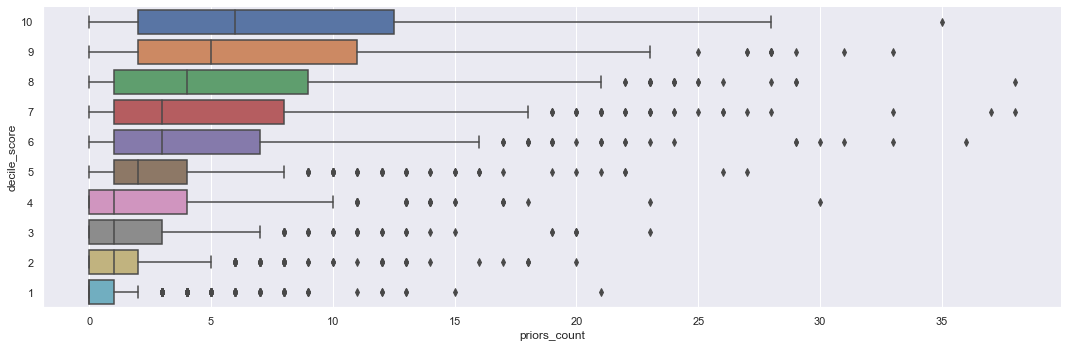

In [101]:
sns.catplot(data=df, x='priors_count', y='decile_score', orient = 'h', kind = 'box', aspect = 3, order = [10,9,8,7,6,5,4,3,2,1])

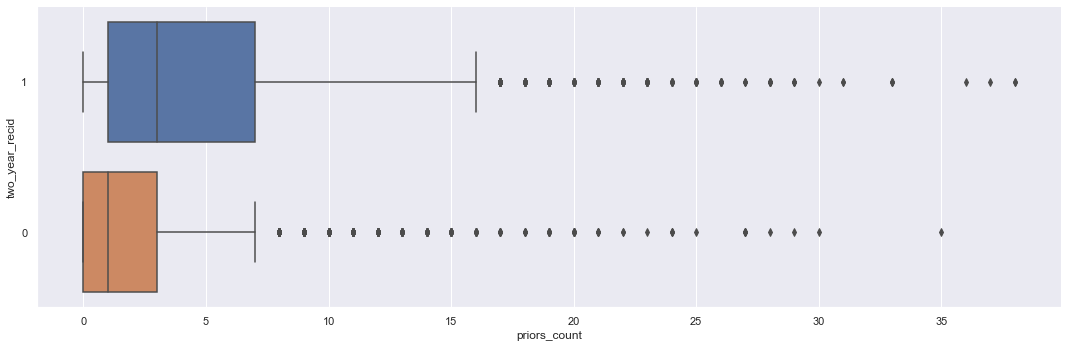

In [85]:
sns.catplot(data=df, x='priors_count', y='two_year_recid', aspect = 3, kind = 'box', orient = 'h', order = [1,0])

In [47]:
xy = df['priors_count'].corr(df['decile_score'])
xy

0.43535010348696557

In [53]:
df['priors_count'].count()

7214

In [50]:
xz = df['priors_count'].corr(df['two_year_recid'])
xz

0.2751168775635826

In [52]:
yz = df['decile_score'].corr(df['two_year_recid'])
yz

0.35070264269452134

In [55]:
dependent_corr(xy, xz, yz, 7214, twotailed = False)

(13.241918337760726, 0.0)

### With a p-value of 0, we can conclude that the COMPAS risk scores overestimate increase in recidivism with increase in number of prior charges. 

## Hypothesis: COMPAS risk scores overestimate increase in VIOLENT recidivism according to number of prior charges

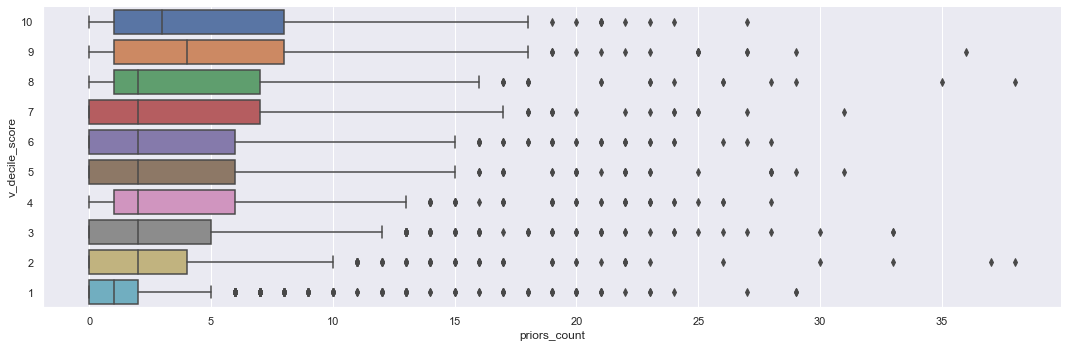

In [104]:
sns.catplot(data=df, x='priors_count', y='v_decile_score', orient = 'h', kind = 'box', aspect = 3, order = [10,9,8,7,6,5,4,3,2,1])

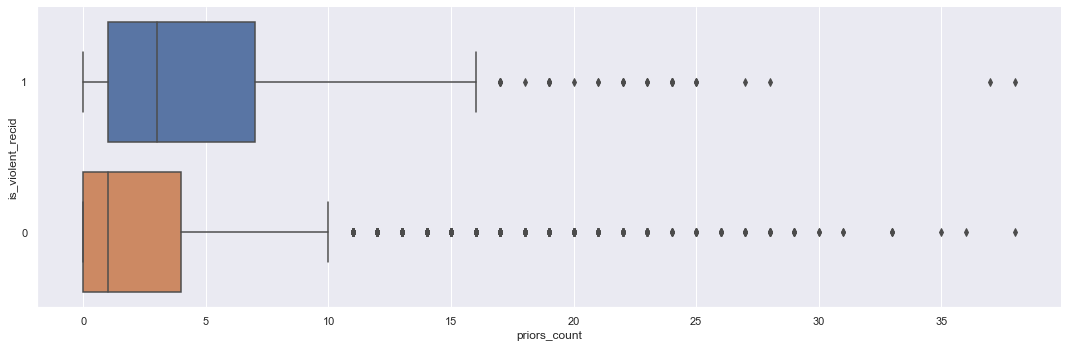

In [105]:
sns.catplot(data=df, x='priors_count', y='is_violent_recid', aspect = 3, kind = 'box', orient = 'h', order = [1,0])

In [64]:
xy = df['priors_count'].corr(df['v_decile_score'])
xy

0.20867432286770085

In [65]:
xz = df['priors_count'].corr(df['is_violent_recid'])
xz

0.09120859032736257

In [66]:
yz = df['v_decile_score'].corr(df['is_violent_recid'])
yz

0.17954998229700206

In [67]:
dependent_corr(xy, xz, yz, 7214, twotailed = False)

(7.948011749976181, 1.1102230246251565e-15)

### With a p-value of 0, we can conclude that the COMPAS risk scores overestimate increase in VIOLENT recidivism with increase in number of prior charges. 